In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('shoes_size.csv')
data.head()

,User,nike,adidas,vans,converse,newbalance,fila,dr_martens,MLB,lacoste,goose,hoka,asics,skechers
0,1,240.0,235.0,240.0,240.0,240.0,NaN,NaN,NaN,240.0,NaN,NaN,NaN,NaN
1,2,275.0,NaN,NaN,275.0,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,265.0,NaN,NaN,265.0,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,225.0,220.0,200.0,210.0,230.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,245.0,240.0,240.0,245.0,240.0,NaN,245.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
rs_data = data.iloc[:, 1:6]
print(data.shape)
rs_data.head()

(44, 14)


,nike,adidas,vans,converse,newbalance
0,240.0,235.0,240.0,240.0,240.0
1,275.0,NaN,NaN,275.0,275.0
2,265.0,NaN,NaN,265.0,NaN
3,225.0,220.0,200.0,210.0,230.0
4,245.0,240.0,240.0,245.0,240.0


In [4]:
m = rs_data.mean(axis=1)
for i, col in enumerate(rs_data):
    rs_data.iloc[:, i] = rs_data.iloc[:, i].fillna(m)
rs_data.head()

,nike,adidas,vans,converse,newbalance
0,240.0,235.0,240.0,240.0,240.0
1,275.0,275.0,275.0,275.0,275.0
2,265.0,265.0,265.0,265.0,265.0
3,225.0,220.0,200.0,210.0,230.0
4,245.0,240.0,240.0,245.0,240.0


In [5]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = rs_data.to_numpy()
matrix


array([[240.        , 235.        , 240.        , 240.        ,
        240.        ],
       [275.        , 275.        , 275.        , 275.        ,
        275.        ],
       [265.        , 265.        , 265.        , 265.        ,
        265.        ],
       [225.        , 220.        , 200.        , 210.        ,
        230.        ],
       [245.        , 240.        , 240.        , 245.        ,
        240.        ],
       [280.        , 275.        , 275.        , 275.        ,
        276.25      ],
       [230.        , 228.75      , 225.        , 235.        ,
        225.        ],
       [265.        , 270.        , 270.        , 265.        ,
        265.        ],
       [250.        , 245.        , 250.        , 248.75      ,
        250.        ],
       [275.        , 270.        , 280.        , 275.        ,
        275.        ],
       [265.        , 265.        , 265.        , 265.        ,
        265.        ],
       [255.        , 255.        , 260.   

In [6]:
# user_ratings_mean은 사용자의 평균 평점 
# sizes_mean = np.mean(matrix, axis = 1)
sizes_mean = m.to_numpy()
sizes_mean

array([239.        , 275.        , 265.        , 217.        ,
       242.        , 276.25      , 228.75      , 267.        ,
       248.75      , 275.        , 265.        , 257.5       ,
       246.66666667, 275.        , 238.33333333, 270.        ,
       236.        , 226.        , 262.5       , 233.75      ,
       230.        , 246.        , 247.        , 240.        ,
       238.33333333, 227.5       , 228.75      , 227.        ,
       297.5       , 247.        , 240.        , 247.5       ,
       268.75      , 266.25      , 280.        , 270.        ,
       270.        , 270.        , 237.5       , 250.        ,
       270.        , 272.5       , 250.        , 250.        ])

In [7]:
# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - sizes_mean.reshape(-1, 1)
matrix_user_mean

array([[  1.        ,  -4.        ,   1.        ,   1.        ,
          1.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  8.        ,   3.        , -17.        ,  -7.        ,
         13.        ],
       [  3.        ,  -2.        ,  -2.        ,   3.        ,
         -2.        ],
       [  3.75      ,  -1.25      ,  -1.25      ,  -1.25      ,
          0.        ],
       [  1.25      ,   0.        ,  -3.75      ,   6.25      ,
         -3.75      ],
       [ -2.        ,   3.        ,   3.        ,  -2.        ,
         -2.        ],
       [  1.25      ,  -3.75      ,   1.25      ,   0.        ,
          1.25      ],
       [  0.        ,  -5.        ,   5.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [ -2.5       ,  -2.5       ,   2.5  

In [8]:
pd.DataFrame(matrix_user_mean, columns = rs_data.columns).head()

,nike,adidas,vans,converse,newbalance
0,1.0,-4.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,8.0,3.0,-17.0,-7.0,13.0
4,3.0,-2.0,-2.0,3.0,-2.0


In [9]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [10]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 4)

In [11]:
sigma = np.diag(sigma)

In [12]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + sizes_mean.reshape(-1, 1)

In [13]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = rs_data.columns)
print(df_svd_preds.shape)
df_svd_preds.head()

(44, 5)


,nike,adidas,vans,converse,newbalance
0,240.0,235.0,240.0,240.0,240.0
1,275.0,275.0,275.0,275.0,275.0
2,265.0,265.0,265.0,265.0,265.0
3,225.0,220.0,200.0,210.0,230.0
4,245.0,240.0,240.0,245.0,240.0


In [14]:
def roundTraditional(val, digits):
    return round(val+10**(-len(str(val))-1), digits)

def recommend_movies(df_svd_preds, user_id, brands):

    sorted_user_predictions = roundTraditional(df_svd_preds.iloc[user_id][brands], -1)
    return sorted_user_predictions

In [15]:
prdictions = recommend_movies(df_svd_preds, 6, 'adidas')
prdictions

230.0

In [19]:
from shoebox import rs_system

user_id = 10
brand='converse'

size = rs_system(user_id, brand)
print('User: ', user_id, '브랜드: ', brand, '추천 사이즈: ', size)

User:  10 브랜드:  converse 추천 사이즈:  270.0


In [36]:
data = pd.read_csv('shoes_size.csv')
data.head()

,User,nike,adidas,vans,converse,newbalance,fila,dr_martens,MLB,lacoste,goose,hoka,asics,skechers
0,1,240.0,235.0,240.0,240.0,240.0,NaN,NaN,NaN,240.0,NaN,NaN,NaN,NaN
1,2,275.0,NaN,NaN,275.0,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,265.0,NaN,NaN,265.0,NaN,NaN,260.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,225.0,220.0,200.0,210.0,230.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,245.0,240.0,240.0,245.0,240.0,NaN,245.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
rs_data = data.iloc[:, 1:6]
print(data.shape)
rs_data.head()

(44, 14)


,nike,adidas,vans,converse,newbalance
0,240.0,235.0,240.0,240.0,240.0
1,275.0,NaN,NaN,275.0,275.0
2,265.0,NaN,NaN,265.0,NaN
3,225.0,220.0,200.0,210.0,230.0
4,245.0,240.0,240.0,245.0,240.0


In [38]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = rs_data.to_numpy()
matrix

array([[240., 235., 240., 240., 240.],
       [275.,  nan,  nan, 275., 275.],
       [265.,  nan,  nan, 265.,  nan],
       [225., 220., 200., 210., 230.],
       [245., 240., 240., 245., 240.],
       [280., 275., 275., 275.,  nan],
       [230.,  nan, 225., 235., 225.],
       [265., 270., 270., 265., 265.],
       [250., 245., 250.,  nan, 250.],
       [ nan, 270., 280.,  nan,  nan],
       [ nan, 265., 265., 265.,  nan],
       [255., 255., 260., 260.,  nan],
       [245., 250., 245.,  nan,  nan],
       [275.,  nan,  nan, 275., 275.],
       [ nan, 240., 240., 235.,  nan],
       [270.,  nan, 270., 270.,  nan],
       [235., 235., 240., 235., 235.],
       [220., 230., 230., 230., 220.],
       [260.,  nan,  nan,  nan, 265.],
       [230., 235., 240., 230.,  nan],
       [230., 230., 230., 230.,  nan],
       [250., 245., 245., 245., 245.],
       [250., 245., 245., 250., 245.],
       [240.,  nan,  nan, 240.,  nan],
       [240., 240.,  nan,  nan, 235.],
       [230., 225., 225.,

In [39]:
def new_cosine(u, v):
    m = u.shape[0] 
    udotv = 0
    u_norm = 0
    v_norm = 0
    for i in range(m):
        if (np.isnan(u[i])) or (np.isnan(v[i])): # Logical OR operator 참고
            continue
            
        udotv += u[i] * v[i]
        u_norm += u[i] * u[i]
        v_norm += v[i] * v[i]

    u_norm = np.sqrt(u_norm)
    v_norm = np.sqrt(v_norm)
    
    if (u_norm == 0) or (v_norm == 0):
        ratio = 1.0
    else:
        ratio = udotv / (u_norm * v_norm)
    return ratio

In [40]:
len_array=np.arange(len(matrix))
len_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [41]:
xx, yy = np.meshgrid(len_array, len_array)
xx, yy

(array([[ 0,  1,  2, ..., 41, 42, 43],
        [ 0,  1,  2, ..., 41, 42, 43],
        [ 0,  1,  2, ..., 41, 42, 43],
        ...,
        [ 0,  1,  2, ..., 41, 42, 43],
        [ 0,  1,  2, ..., 41, 42, 43],
        [ 0,  1,  2, ..., 41, 42, 43]]),
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [41, 41, 41, ..., 41, 41, 41],
        [42, 42, 42, ..., 42, 42, 42],
        [43, 43, 43, ..., 43, 43, 43]]))

In [44]:
sim_df = pd.DataFrame([new_cosine(np.array(matrix[i]), np.array(matrix[j])) for i, j in zip(x,y)] for y, x in zip(xx, yy))
sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,1.000000,1.000000,0.998678,0.999948,0.999952,0.999836,0.999876,1.000000,0.999971,...,0.999959,0.999951,1.000000,1.0,0.999945,1.0,1.0,0.999999,1.0,1.0
1,1.000000,1.000000,1.000000,0.999266,0.999953,0.999959,0.999843,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,1.000000,1.000000,1.000000,0.999406,1.000000,0.999959,0.999942,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
3,0.998678,0.999266,0.999406,1.000000,0.998738,0.999200,0.998225,0.998487,0.998581,0.997838,...,0.999442,0.999835,0.999406,1.0,0.997601,1.0,1.0,0.999998,1.0,1.0
4,0.999948,0.999953,1.000000,0.998738,1.000000,0.999963,0.999952,0.999845,0.999948,0.999835,...,0.999947,0.999952,1.000000,1.0,0.999783,1.0,1.0,0.999999,1.0,1.0


In [50]:
# size_sim = cosine_similarity(rs_data, rs_data)
# print(size_sim.shape)

In [45]:
size_sim_df = pd.DataFrame(data = sim_df, index = sim_df.index, columns = sim_df.index)
size_sim_df.shape
size_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.000000,1.000000,1.000000,0.998678,0.999948,0.999952,0.999836,0.999876,1.000000,0.999971,...,0.999959,0.999951,1.000000,1.0,0.999945,1.0,1.0,0.999999,1.0,1.0
1,1.000000,1.000000,1.000000,0.999266,0.999953,0.999959,0.999843,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
2,1.000000,1.000000,1.000000,0.999406,1.000000,0.999959,0.999942,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0
3,0.998678,0.999266,0.999406,1.000000,0.998738,0.999200,0.998225,0.998487,0.998581,0.997838,...,0.999442,0.999835,0.999406,1.0,0.997601,1.0,1.0,0.999998,1.0,1.0
4,0.999948,0.999953,1.000000,0.998738,1.000000,0.999963,0.999952,0.999845,0.999948,0.999835,...,0.999947,0.999952,1.000000,1.0,0.999783,1.0,1.0,0.999999,1.0,1.0


In [46]:
def recommend(df_svd_preds, user_id, brands):

    sorted_user_predictions = df_svd_preds.iloc[user_id][brands]

    return sorted_user_predictions

In [48]:
# 해당 user와 가장 유사도가 높은 user
sim_df[5].sort_values(ascending=False)

10    1.000000
43    1.000000
18    1.000000
42    1.000000
40    1.000000
39    1.000000
37    1.000000
5     1.000000
41    1.000000
21    1.000000
25    0.999998
20    0.999969
31    0.999964
22    0.999964
34    0.999964
28    0.999964
15    0.999964
4     0.999963
2     0.999959
13    0.999959
1     0.999959
23    0.999959
24    0.999959
30    0.999959
36    0.999959
35    0.999959
8     0.999959
0     0.999952
14    0.999951
26    0.999949
16    0.999903
7     0.999883
11    0.999878
12    0.999877
29    0.999873
33    0.999845
9     0.999835
38    0.999809
6     0.999806
32    0.999787
27    0.999776
19    0.999739
17    0.999639
3     0.999200
Name: 5, dtype: float64

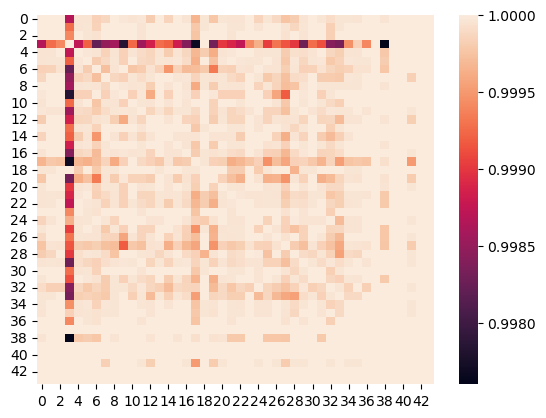

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(size_sim_df)
plt.show()